In [92]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset
we use the read_csv() to access data from the CSV file and retrieves it in the form of a Dataframe.
The head() method is used to return top n, 5 by default,rows of a data

In [122]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
# To delete a column

df =  df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
#to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
#to see some info about the data like what kind data type we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [97]:
#number of samples in each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Preprocessing the Dataset

In [98]:
#Checking For Null Values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot: >

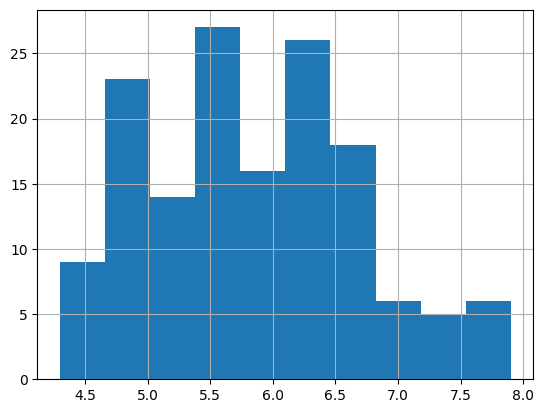

In [99]:
#Histograms
df['SepalLengthCm'].hist()

<AxesSubplot: >

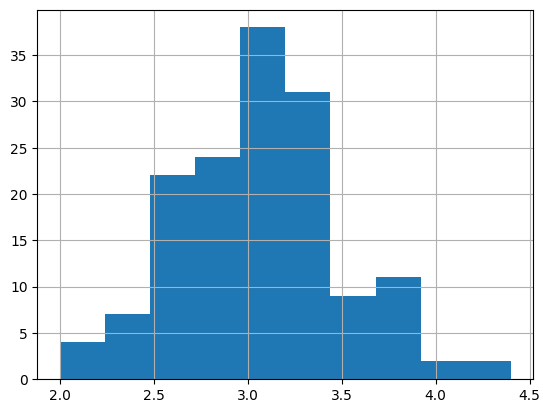

In [100]:
#Histograms
df['SepalWidthCm'].hist()

<AxesSubplot: >

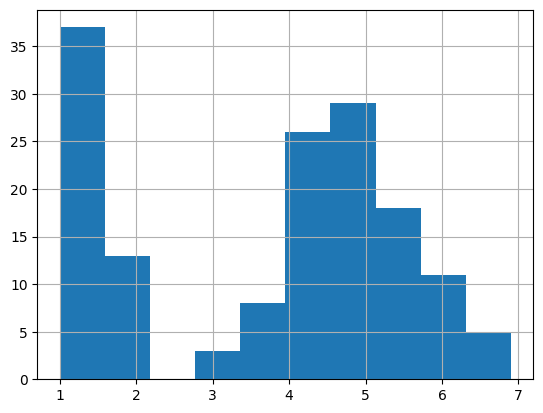

In [101]:
#Histograms
df['PetalLengthCm'].hist()

<AxesSubplot: >

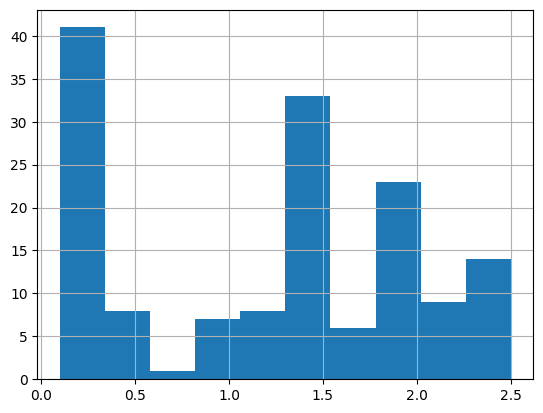

In [102]:
#Histograms
df['PetalWidthCm'].hist()

In [103]:
#scatterplot
colors = ['red', 'orange', 'blue']
species= ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

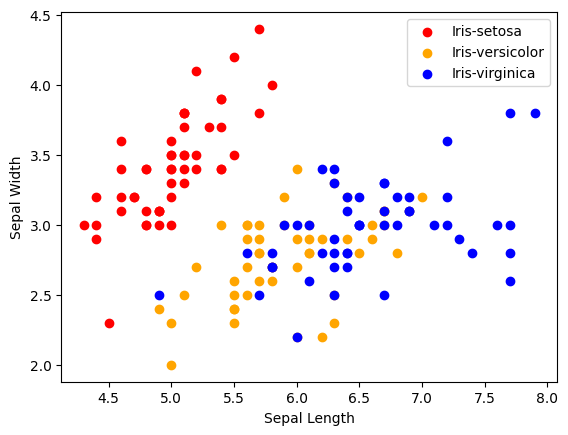

In [104]:
from cProfile import label


for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

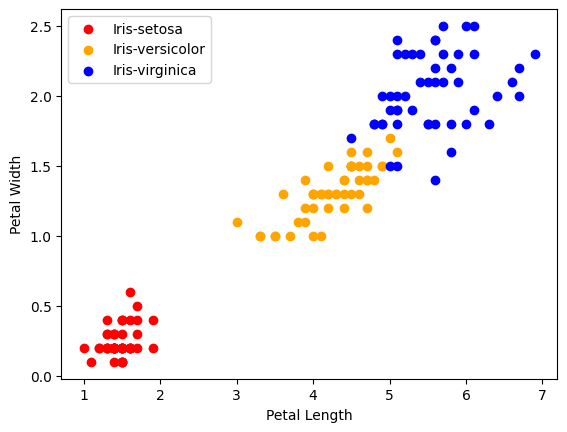

In [105]:

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

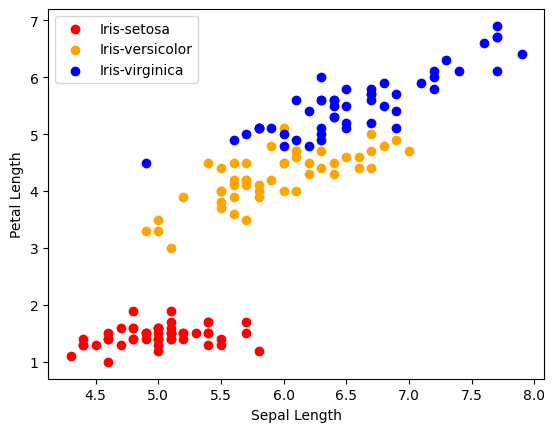

In [106]:

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

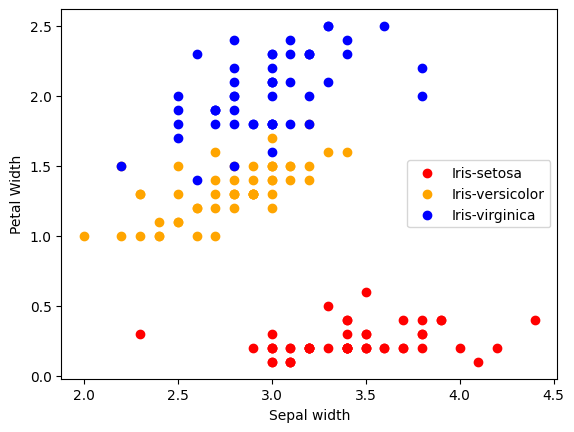

In [107]:

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel('Sepal width')
    plt.ylabel('Petal Width')
    plt.legend()

### Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.


In [108]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

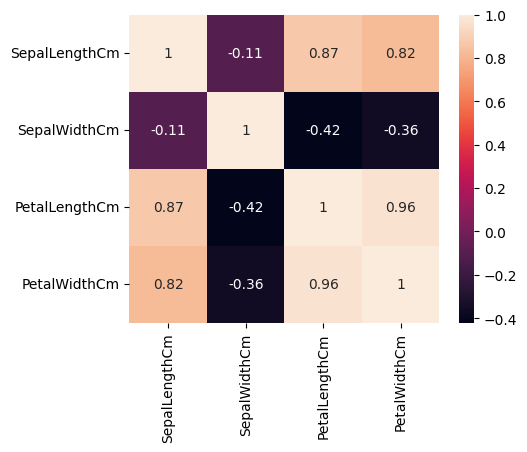

In [109]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

### Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [111]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [112]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

# Logistic Regression

In [113]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [114]:
model.fit(x_train, y_train)

LogisticRegression()

In [115]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


# KNN- K-nearest Neighbours

In [116]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [117]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [118]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


# Decision Tree


In [119]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [120]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [121]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111
